In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1st data set

### discussion entry:

**Adva:**

> ![Adva's:](https://yu.instructure.com/users/15350/files/994090/preview?verifier=F8V2ygZ5e3mWxI4JRZwykbxORYtDfZO50ZPlwfTc)
>
> The above example represents untidy data of boat sightings. 
>
> Like the video mentioned, tidy data has 3 major rules: 
>
> 1. Each variable must have its own column.
> 2. Each observation must have its own row.
> 3. Each value must have its own cell.
>
> The example provided violates rule 1 and 2. The variable “count of boats” is spread over three columns, and a column for boat color does not exist. 
> The insights that can be derived from the data is what is the most common boat color as a whole and divided by the days.   

### process:

1. tidy
    1. import
    3. data types set first column to datetime type and values column to type int
    2. melt: melt red, green blue columns
  
2. analyze
    1. what is the most common boat column
        - By day
        - over all

In [14]:
#1A. import and sanity check with head
df = pd.read_csv('https://raw.githubusercontent.com/jacoblgoodman/DAV-5400/master/project3/data/adva_assraf.csv')
display(df.head())

#1B set date column to date datetype
df.date = pd.to_datetime(df.date)
# sanity check collumns 1 -2
print(df['date'].dt.day_name()[0:2], df.dayname[0:2]) 

,date,dayname,red,green,blue
0,2001-08-01,Wednesday,50,25,71
1,2001-08-02,Thursday,60,31,53
2,2001-08-03,Friday,51,24,50
3,2001-08-04,Saturday,79,21,69
4,2001-08-05,Sunday,77,39,57


0    Wednesday
1     Thursday
Name: date, dtype: object 0    Wednesday
1     Thursday
Name: dayname, dtype: object


In [15]:
#1C make our tidy data frame with .melt
df_tidy = df.melt(id_vars=['date','dayname'],var_name='color',value_name='count').set_index('date').sort_index()

,sum
color,
red,465
blue,429
green,212


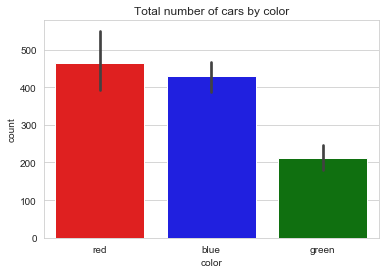

In [17]:
#2 analysis with aggregation
#by day
by_color = df_tidy.groupby('color').agg(np.sum).rename(columns={'count':'sum'}).sort_values('sum',ascending = False)

sns.barplot( x = 'color',y = 'count',data = df_tidy,palette=['red','blue','green'], estimator = sum)
plt.title('Total number of cars by color');
by_color

### Conclusion 1:
`red` is the common boat color 

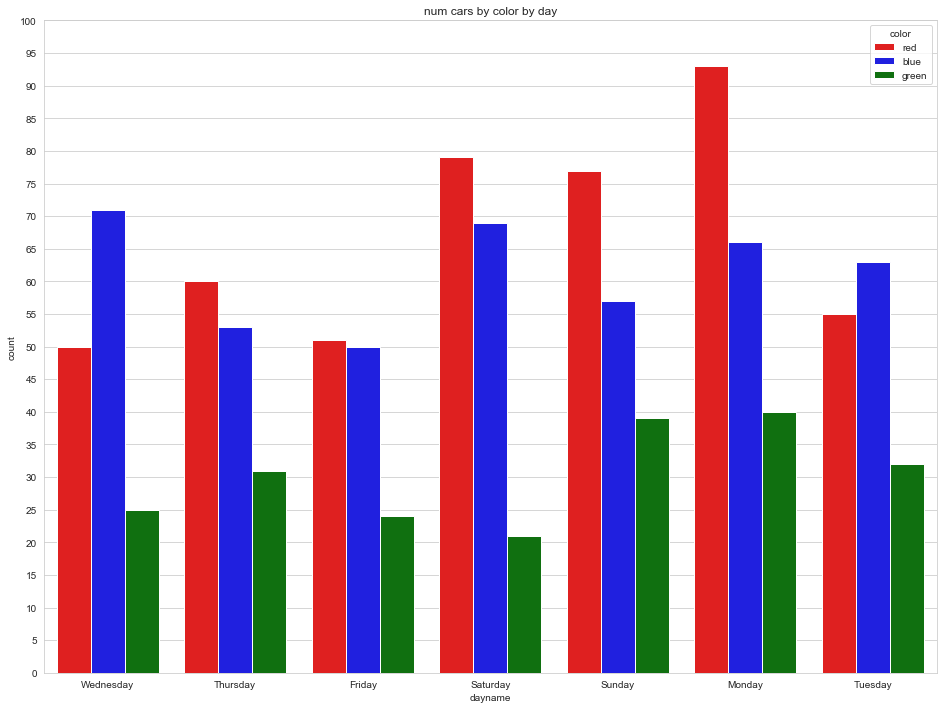

,dayname,color,count
date,,,
2001-08-01,Wednesday,blue,71
2001-08-02,Thursday,red,60
2001-08-03,Friday,red,51
2001-08-04,Saturday,red,79
2001-08-05,Sunday,red,77
2001-08-06,Monday,red,93
2001-08-07,Tuesday,blue,63


In [5]:
#2B most popular color'd boat by day

#visualize 
#set size/ style
plt.figure(figsize=(16,12));
sns.set_style("whitegrid");

#plot
sns.barplot(data = df_tidy,x= 'dayname',y= 'count',hue='color',palette=['red','blue','green']);

#set title ticks and call show to enforce summary table below
plt.title('num cars by color by day');
plt.yticks(np.arange(0 ,df_tidy['count'].max()+10,step= 5))
plt.show();

# summary table table 
display(df_tidy.sort_values('count', ascending = False).groupby(level = 'date').head(1).sort_index())
#i would like the two hours i spent trying to figure out why nlargest was returning weird behavoir back (https://github.com/pandas-dev/pandas/issues/15272)

### conclusion 2 

- `red` was the most common Thursday-Monday or  for $5$ days

- `blue` was the most common on Wednesday or for $1$ day

- `blue` was the most common on Tuesday or for $1$ day

## 2nd data set

### discussion entry:

**Natan:**

> I created a small dataset containing test grades for students in a math class. 
>
> ![Natan](https://yu.instructure.com/users/513/files/994359/preview?verifier=5Y78nTDMM25OHdbSUdXz6EJ6lTZg0yK1zlVWs6D6)
>
> With this dataset we can answer questions such as:
>
> 1. Which student had the highest average test grades?
> 2. Which student had the greatest range of test grades?
> 3. Which test had the highest grades?

### process:

1. tidy
   1. import
   2. handle NA's
       Nan values will be considered to be missed assignments and treated as 0 for averages but will be excluded from differences
   3. index and name columns
   4. stack
1. analyze
    1. Which student had the highest average test grades?
    2. Which student had the greatest range of test grades?  
    3. Which test had the highest grades?

___
### 1.Tidy

In [6]:
#1a import data
#1b set na's to 0
df = pd.read_csv('https://raw.githubusercontent.com/jacoblgoodman/DAV-5400/master/project3/data/natan_tests.csv',index_col =0)
df

,test1,test2,test3,test4
Name,,,,
reggie miller,97.0,80,87.0,91
dan bonner,76.0,68,80.0,81
steve smith,84.0,75,NaN,86
charles barkey,NaN,89,NaN,76
kenny smith,80.0,81,79.0,85
chris webber,75.0,75,76.0,92
jalen rose,80.0,85,84.0,83
jim jackson,92.0,91,94.0,95


In [7]:
#1.c set column index to 'tests'
df.columns.name = 'tests'
#tidy
df_tidy = df.stack()

#name tidy series
df_tidy.name = 'grades'
df_tidy.head(10)

Name           tests 
reggie miller  test1     97.0
               test2     80.0
               test3     87.0
               test4     91.0
dan  bonner    test1     76.0
               test2     68.0
               test3     80.0
               test4     81.0
steve smith    test1     84.0
               test2     75.0
Name: grades, dtype: float64

---
### 2.analyze:

In [8]:
#2a Which student had the highest average test grades na's set to 0 
df_tidy.fillna(0).mean(level=0).tail(2)


Name
jalen rose     83.0
jim jackson    93.0
Name: grades, dtype: float64

#### 2a conclusion:

Jim Jackson has the highest average test average

In [9]:
#2b Which student had the greatest range of test grades? na's excluded differnce found with lamdba 
df_tidy.groupby(level=0).apply(lambda x: x.max()-x.min()).sort_values()

Name
jim jackson        4.0
jalen rose         5.0
kenny smith        6.0
steve smith       11.0
charles barkey    13.0
dan  bonner       13.0
chris webber      17.0
reggie miller     17.0
Name: grades, dtype: float64

#### 2b conclusion:

Chris Webber and Reggie miller both have the largest range of test grades with a spread of 17 points

In [10]:
#2c Which test had the highest grades?
df_tidy.reset_index().groupby('tests').agg(['mean','max'])

grades      
             mean   max
tests                  
test1   83.428571  97.0
test2   80.500000  91.0
test3   83.333333  94.0
test4   86.125000  95.0

#### 2c conclusion:
- test1 had the highest grade a 97
- test4 had the highest average grade with ~86

## 3rd data set
### discussion entry:
**jeeho:**
>![jeeho](https://yu.instructure.com/users/15478/files/992982/preview?verifier=fsKvRQg4N9Fh8Rw2oOPG51ExyIzwxfawOm63GqFQ)
>
>The following dataset is of destination reviews. The reviews falling in 6 categories among destinations across South India were considered, and the count of reviews in each category for every reviewer (traveler) is captured. On this data, We can analyze which class among the six has the highest frequency of reviews by the users.

1. tidy
    1. import and set index
    2. name columns
    3. stack
2. analyze
   1. count  and mean of reviews by category to determine which has the highest frequency of review


In [11]:
#1a. import data frame and set index oclumn
df = pd.read_csv('https://raw.githubusercontent.com/jacoblgoodman/DAV-5400/master/project3/data/jeeho_bae.csv',index_col = 'user id')
#1b. name columns
df.columns.name = 'category'
#1c. stack method to data 
df_tidy = df.stack()

#tidy dataset
df_tidy

user id  category 
user 1   sports        2
         religoius    77
         nature       79
         theatre      69
         shopping     68
         picnic       95
user 2   sports        2
         religoius    62
         nature       76
         theatre      76
         shopping     69
         picnic       68
user 3   sports        2
         religoius    50
         nature       97
         theatre      87
         shopping     50
         picnic       75
user 4   sports        2
         religoius    68
         nature       77
         theatre      95
         shopping     76
         picnic       61
user 5   sports        2
         religoius    98
         nature       54
         theatre      59
         shopping     95
         picnic       86
dtype: int64

In [12]:
#2a group by review category and aggregate (sum and mean)
df_tidy.groupby(level = 'category').agg([('number of review','sum'),('average per user','mean')])

,number of review,average per user
category,,
nature,383,76.6
picnic,385,77.0
religoius,355,71.0
shopping,358,71.6
sports,10,2.0
theatre,386,77.2


### 2a conclusion

the theater category has largest number of reviews but the picnic category has the most per user. 



## extra credit the 4th data set

**as an extra I developed a plan and did basic implementation of the entire candy data set**

### discussion entry:

**Minyeong:**

> ![Minyeong](https://yu.instructure.com/users/14520/files/994651/preview?verifier=74UL6oNFK1pLYN8PmfFZ3RNrW3lw2aQV4UvYysbc)
>
> Above dataset is the survey data for candy hierarchy in 2017.([http://www.scq.ubc.ca/so-much-candy-data-seriously/](http://www.scq.ubc.ca/so-much-candy-data-seriously/)) After tidying this dataset, we can analyze which candies are the most favored among those survey participants. Also, we can analyze if there are relationships between the regions, ages, genders and favored candies.

### process:

1. get data

   1. Download full data set and .pdf of survey for data dictionary

   2. import

   
2. **initial clean up and tidy**  
    
    1. drop columns unnecessary to analysis
        1. drop columns after q7 this is noted below
        2. `Q1: GOING OUT?` unnecessary for current requested analysis and dropped
    2. rows with no data drop
    3. tidy
       - using melt function tidy data
    4. set internal id to index  
    
    
3. **Next Steps munging**  
    
    4. gender: empty| I'd rather not say = Nan (leave row if candy assessment data is available)

    5. age: 
         1. anything not numeric to Nan (this sill sacrifice some values that could potentially be parsed 80 1/2 for instance but will be done for ease process)
         2. values > 100 entire to Nan (based on sample observations of data)

    6. country attempt to standardize entries: (not yet done)

         1. develop word list (united states, USA, UK ect) and utilize match or join to standardize 
         2. country empty to NA (anlysis will not be done at this level in this analysis but some clean up/ standarization would need to be done if we were)
    7. candy rating
        3. replace joy meh and despair  with 1, 0 , -1  respectively to make averages and other analysis easier 
        4. evaluate whether to drop joke candies (example: Vials of pure high fructose corn syrup, for main-lining into your vein)
        
----
       ## These columns dropped below plan is included as reference for future analysis. 

      8. joy other: **incorporating these values into the analysis will be out of scope for this analysis and they will be dropped for simplification: the following steps are provided as theoretical as to how they could be handled**  marked as Joy and merged back into main dataset after its tidy

         1. create sub table with other observational features and joy column (id would be sufficient )
         2. parse into individual records with value 1 (see 6.4)  and merge back once table is melted to long format

      9. despair other: **see above**

      10. other comments: **text data could potentially be utilized for NLPanalysis**

      11. Dress: null values to NAN

      12. Day: null values to NAN

      13. data stored in 4 columns

          1. melt into one column
          2. set nulls to NaN

      14. reference information related to q12 

In [11]:
#1B import data set 
df4 = pd.read_excel('https://raw.githubusercontent.com/jacoblgoodman/DAV-5400/master/project3/data/candyhierarchy2017.xlsx')
#sanity check
df4.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


**initial clean up**  

null and initial data munging plan:


1. drop columns unnecessary to analysis

    2. drop columns after q7 this is noted below
    
    3.  `Q1: GOING OUT?` unnecessary for current requested analysis and dropped

3. rows with no data drop

2. tidy
    1. using melt function tidy data

2. set internal id to index



In [71]:
#drop collumns
df4_slice = df4.drop(df4.columns[-11:], axis=1).drop('Q1: GOING OUT?', axis=1)

#drop all entries that are entirly null except for id
df4_slice.dropna(how='all', inplace = True,subset=df4_slice.columns[1:])

#tidy
df4_tidy = df4_slice.melt(id_vars= df4_slice.columns[:5],var_name = 'Candy', value_name = 'Rating')

#set Index
df4_tidy.set_index('Internal ID', inplace = True)


#sanity check
df4_tidy.head()

,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Candy,Rating
Internal ID,,,,,,
90272821,Male,44,USA,NM,Q6 | 100 Grand Bar,MEH
90272829,Male,49,USA,Virginia,Q6 | 100 Grand Bar,NaN
90272840,Male,40,us,or,Q6 | 100 Grand Bar,MEH
90272841,Male,23,usa,exton pa,Q6 | 100 Grand Bar,JOY
90272852,Male,NaN,NaN,NaN,Q6 | 100 Grand Bar,JOY




**Next Steps**  
column gender:   
- if empty| I'd rather not say set to NaN

column age:

- anything not int to NAn (this sill sacrifice some values that could potentially be parsed 80 1/2 for instance but will be done for ease process)
- values > 100 to NaN for prob improper entry 


Male      151101
Female     86417
NaN        13184
Name: Q2: GENDER, dtype: int64

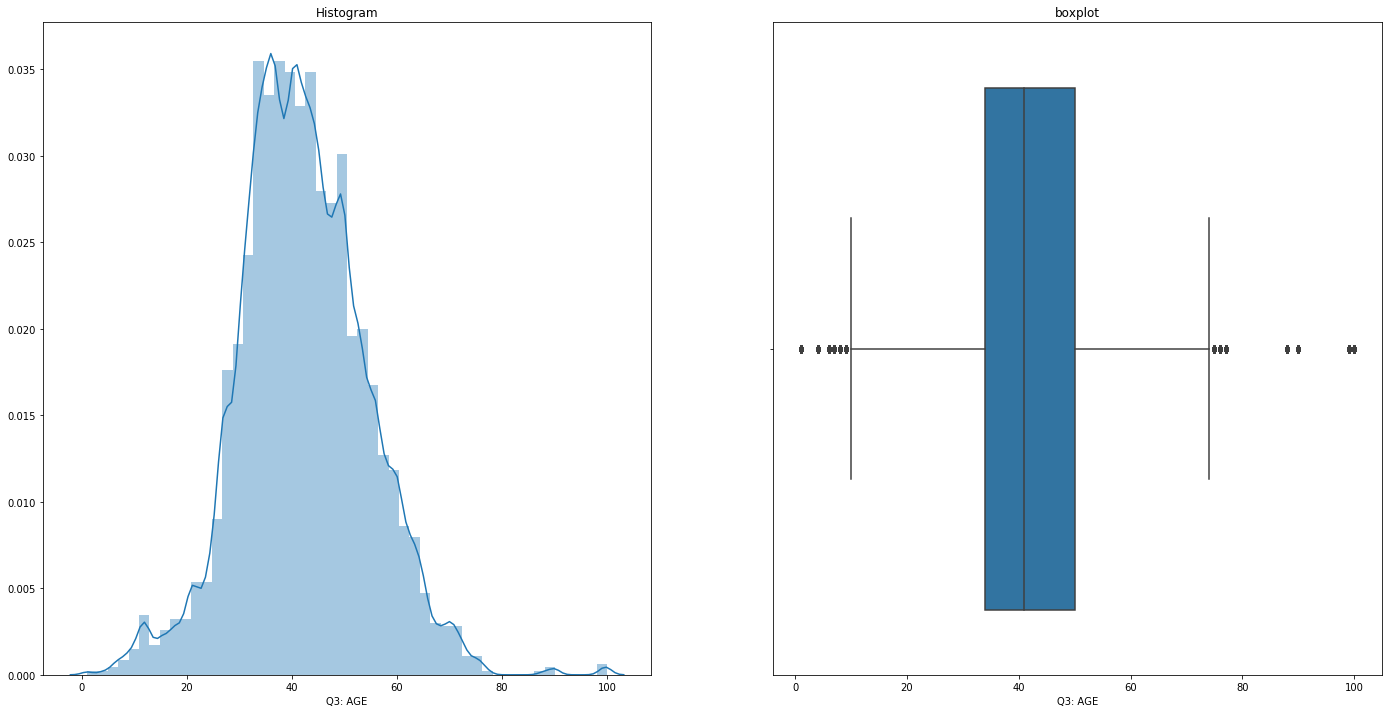

In [102]:
#gender
#create comparsion set to replace
replace = ['I\'d rather not say','Other']
# replace values to NaN
df4_tidy['Q2: GENDER'].mask(df4_tidy['Q2: GENDER'].isin(replace),inplace=True)
# sanity check
display(df4_tidy['Q2: GENDER'].value_counts(dropna = False))
#age
df4_tidy['Q3: AGE'] = pd.to_numeric(df4_tidy['Q3: AGE'],errors='coerce')
df4_tidy.loc[df4_tidy['Q3: AGE'] >100,'Q3: AGE'] = np.nan

#sanity check age
plt.figure(figsize=(24,12));
plt.subplot(1,2,1);
sns.distplot(df4_tidy['Q3: AGE'].dropna());
plt.title('Histogram');
plt.subplot(1,2,2);
sns.boxplot(df4_tidy['Q3: AGE'].dropna());
plt.title('boxplot');

 1    64206
-1    58254
 0    53095
Name: Rating, dtype: int64

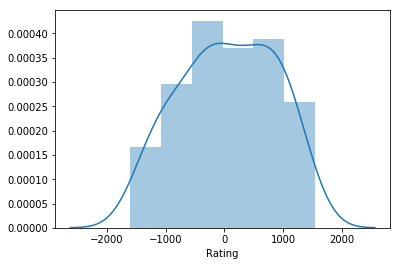

In [123]:
# rating
df4_tidy.loc[df4_tidy.Rating =='MEH','Rating'] = 0
df4_tidy.loc[df4_tidy.Rating =='DESPAIR','Rating'] = -1
df4_tidy.loc[df4_tidy.Rating =='JOY','Rating'] = 1
display(df4_tidy.Rating.value_counts())
distribution of total rankings
sns.distplot(df4_tidy.groupby(by='Candy')['Rating'].sum().sort_values());